In [ ]:
'''
Notes:

Predict both appliances and lights (зачем? давай только для appliances)




A GENERAL SCHEME FOR AN EMPIRICAL APPLICATION

1) DEFINE THE AIM(S) OF THE ANALYSIS (RESEARCH QUESTION): the more detailed, the better.


3) PROVIDE A LITERATURE REVIEW, in order to understand the main findings already available in the scientific community and prepare the expected results or relationships.

The paper "Data driven prediction models of energy use of appliances in a low-energy house" is the source of dataset.


2) DO SOME DESCRIPTIVE ANALYSIS, in order to understand the main features of the dataset, 
the presence of some errors or missing values, and so on. 
The researcher may improve the dataset adding information from external sources (i.e. the dataset contains data from many countries, so country-specific information like GDP or population characteristics, carried out from Eurostat or OECD, can be added).

Make plots from the Medium article - key insights about the data 
(Appliances time series Wh consumption, Appliances histogram distribution, e.t.c)

Linear model is not enough (appliances don't correspond to any other fieature linearly)



4) CHOOSE THE STATISTICAL MODEL/APPROACH FOR THE ANALYSIS, according to the main findings of points 2 and 3 above, as well as the goal(s) of the work.

which models I choose?
Linear, Neural Network, Gradient Boosting (as in paper, but tuned better as in medium), TODO(check with the course)

TODO: investigate arch, garch, arima and other models from the course (can i apply them to my problem? if no - why)

5) ESTIMATE THE MODEL.


6) REPORT AND INTERPRET THE RESULTS.


7) HIGHLIGHT THE MAIN CONCLUSIONS / PRACTICAL SUGGESTIONS.

'''

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [72]:
sns.set(color_codes=True)

In [73]:
data = pd.read_csv("./energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [74]:
data.describe()

# Temperature inside the house varies between 14.89 Deg & 29.85 Deg , 
# temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . 
# The reason for this variation is sensors are kept outside the house


# Humidity inside house varies is between 20.60% to 63.36% 
# with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [67]:
# Number of null values in all columns
# As shown below , there are no null values in the dataset
data.isnull().sum().sort_values(ascending = True)

Appliances     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
Visibility     0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
T6             0
Tdewpoint      0
dtype: int64

In [ ]:
# Data visualization

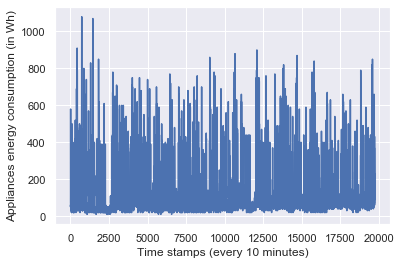

In [31]:
plt.plot(list(range(len(data['Appliances']))), data['Appliances'])
plt.xlabel('Time stamps (every 10 minutes)') 
plt.ylabel('Appliances energy consumption (in Wh)') 
plt.show()

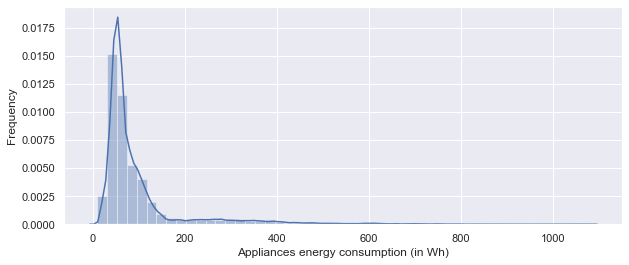

In [47]:
fig = plt.figure(figsize=(10, 4))
plt.xlabel("Appliances energy consumption (in Wh)")
plt.ylabel("Frequency")

sns.distplot(list(data['Appliances']), bins = 50)

# high energy consumption cases are very low

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20067780>,
      dtype=object)

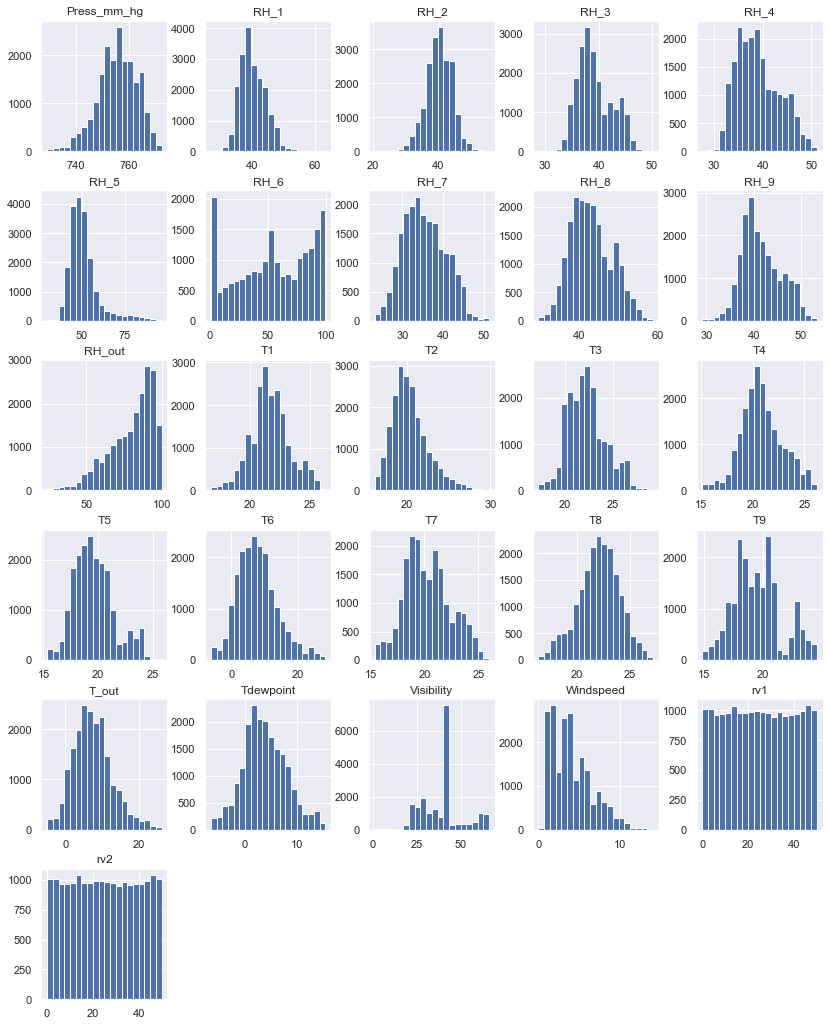

In [52]:
data.iloc[:,3:].hist(bins = 20, figsize = (14, 18))

# Most of the values follow normal distribution, but some of the values are not normally distributed

In [57]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [60]:
# All inside temperature values have positive correlation with the appliances (more heating is used - warmer - more electricity is spent)
data.loc[:, ['Appliances', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']].corr()

,Appliances,T1,T2,T3,T4,T5,T6,T7,T8,T9
Appliances,1.000000,0.055447,0.120073,0.085060,0.040281,0.019760,0.117638,0.025801,0.039572,0.010010
T1,0.055447,1.000000,0.836834,0.892402,0.877001,0.885247,0.654769,0.838705,0.825413,0.844777
T2,0.120073,0.836834,1.000000,0.735245,0.762066,0.720550,0.801186,0.663660,0.578191,0.675535
T3,0.085060,0.892402,0.735245,1.000000,0.852778,0.888169,0.686882,0.847374,0.795283,0.901324
T4,0.040281,0.877001,0.762066,0.852778,1.000000,0.871813,0.652350,0.877763,0.796256,0.889439
T5,0.019760,0.885247,0.720550,0.888169,0.871813,1.000000,0.629161,0.870624,0.824981,0.911055
T6,0.117638,0.654769,0.801186,0.686882,0.652350,0.629161,1.000000,0.619085,0.482836,0.667177
T7,0.025801,0.838705,0.663660,0.847374,0.877763,0.870624,0.619085,1.000000,0.882123,0.944776
T8,0.039572,0.825413,0.578191,0.795283,0.796256,0.824981,0.482836,0.882123,1.000000,0.869338
T9,0.010010,0.844777,0.675535,0.901324,0.889439,0.911055,0.667177,0.944776,0.869338,1.000000


In [ ]:
# Data transformation

In [75]:
# drop random columns, light column - unnecessary columns
data.drop(['date', 'rv1', 'rv2', 'lights'], axis=1, inplace=True)

In [ ]:
# Models

In [ ]:
# We can use ARMA model because the data is stationary
# First use ARMA, then all other models

# TODO

In [77]:
from sklearn import preprocessing, model_selection, metrics

In [78]:
# Data preprocessing

from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data, test_size=0.25,random_state=40)


col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

col_target = ["Appliances"]

# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather]
target_vars = train[col_target]

# Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

# Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target]

test = test[list(test_X.columns.values) + col_target]

# Create dummy test and training set to hold scaled values (because we want to scale X and Y at the same time)

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test = pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [80]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [ ]:
# Model training

In [83]:
# Linear Regression
from sklearn.linear_model import Ridge

# Gradient Boosting (kind of)
from sklearn.ensemble import ExtraTreesRegressor

# Neural Network
from sklearn.neural_network import MLPRegressor

from sklearn import neighbors
from sklearn.svm import SVR

In [84]:
# Regression models

models = [
           ['Ridge: ', Ridge()],
           ['Gradient Boosting :',ExtraTreesRegressor()],
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [85]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

/Users/neil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [87]:
df

,Name,Test_R2_Score,Test_RMSE_Score,Train_R2_Score,Train_Time
0,Ridge:,0.134456,0.930346,0.149661,0.082060
1,Gradient Boosting :,0.602827,0.630216,1.000000,0.809872
2,MLPRegressor:,0.230769,0.877058,0.285638,1.665254


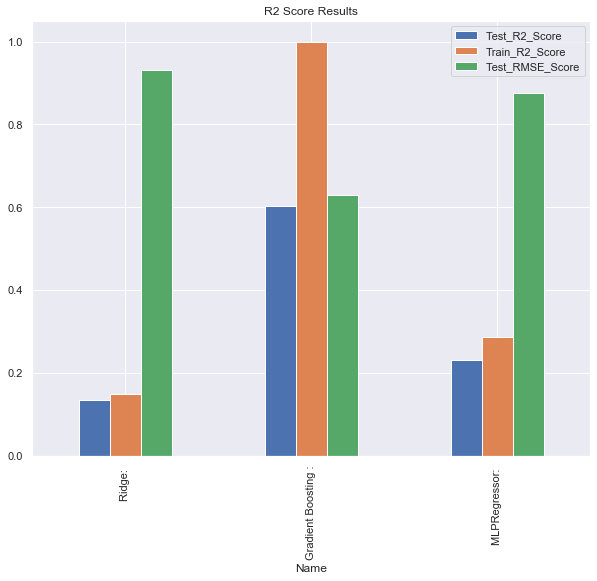

In [88]:
# TODO: Add ARMA model here

df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [ ]:
# Gradient boosting (with feature selection)
# if needed, delete highly correlated features here to match medium 